In [39]:
! pip install scikit-learn scipy matplotlib
! pip install pandas
! pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

In [41]:
columns = ["s", "x", "y", "label"]
df_test = pd.read_csv('./Data_test.csv', names=columns)[1:]
df_train = pd.read_csv('./Data_train.csv', names=columns)[1:]

In [42]:
X_train = df_train.iloc[: , 1: 3]
X_train = np.array(X_train, dtype=float)
X_test = df_test.iloc[: , 1: 3]
X_test = np.array(X_test, dtype=float)
y_train = np.array(df_train['label'], dtype=int)
y_test = np.array(df_test['label'], dtype=int)
y_train_ovr = np.array([0 if y == 1 else 1 for y in y_train])
y_test_ovr = np.array([0 if y == 1 else 1 for y in y_test])

In [43]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [44]:
"""
Task 0: Naïve Logistic Regression [5 pts] 
Make a logistic regression and report the accuracy.
"""
class NLogisticRegression:
    def __init__(self, lr=0.001, n_iterations=1000):
        self.lr = lr
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_predictions = np.dot(X, self.weights) + self.bias
            actual_predictions = sigmoid(linear_predictions)

            dw = (1 / n_samples) * np.dot(X.T, (actual_predictions - y))
            db = (1 / n_samples) * np.sum(actual_predictions - y)

            # Updating the weights and bias
            self.weights = self.weights - (self.lr * dw)
            self.bias = self.bias - (self.lr * db)
            
    def predict(self, X):
        linear_predictions = np.dot(X, self.weights) + self.bias
        return [0 if y<=0.5 else 1 for y in sigmoid(linear_predictions)]

In [45]:
logistic_classifier = NLogisticRegression(lr=0.1)
logistic_classifier.fit(X_train, y_train_ovr)
y_predicted = logistic_classifier.predict(X_test)
accuracy = np.sum(y_predicted == y_test_ovr) / len(y_test)
print("Accuracy of logistic regression is : ", accuracy)

Accuracy of logistic regression is :  0.6570666666666667


In [46]:
"""
Task 2: Linear Parametric Classification [10 pts]
Implement logistic regression model using Scikit-learn. Using the GridSearchCV, optimize the model. 
    1. Make a logistic regression model. Report the weights and the accuracy of the model.
    2. Using the GridSearchCV at various 100  values from  to , build a logistic regression model. 
    Visualize how the model accuracy behaviors. Then report the best model. If the accuracy is 100%, 
    then the model is overfitted. In this case, the model should be regularized. 
    3. Using the best model, classify the test data set.
"""
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train_ovr)
y_predicted = logistic_classifier.predict(X_test)
accuracy = np.sum(y_predicted == y_test_ovr) / len(y_test)
print("Accuracy of sklearn logistic regression is :", accuracy)
print("Weights of the sklearn logistic regression is :", logistic_classifier.coef_, " Bias is :", logistic_classifier.intercept_)

Accuracy of sklearn logistic regression is : 0.6570666666666667
Weights of the sklearn logistic regression is : [[0.0122343  0.06987057]]  Bias is : [0.68940611]


In [47]:
c = np.linspace(1, 10**5, num=100)

In [48]:
"""
2. Using the GridSearchCV at various 100  values from  to , build a logistic regression model. 
    Visualize how the model accuracy behaviors. Then report the best model. If the accuracy is 100%, 
    then the model is overfitted. In this case, the model should be regularized. 
"""
from sklearn.model_selection import GridSearchCV

param_grid = { 'C' : c }                                    
g = GridSearchCV(estimator=logistic_classifier, param_grid = param_grid) 
g.fit(X_train, y_train_ovr)
print("The best model is :", g.best_params_, "with accuracy :", g.best_score_)

The best model is : {'C': 1.0} with accuracy : 0.6698666666666667


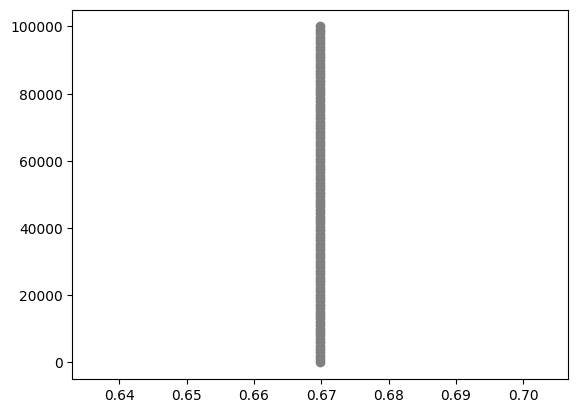

In [49]:
scores = g.cv_results_['mean_test_score']

for i in range(100):
    plt.scatter(scores[i], c[i], c="grey")

In [50]:
"""
3. Using the best model, classify the test data set.
"""
from sklearn.metrics import accuracy_score

predictions_x = g.best_estimator_.predict(X_test)
print("The best model accuracy for test data using GridSearchCV is :", accuracy_score(predictions_x, y_test_ovr))

The best model accuracy for test data using GridSearchCV is : 0.6570666666666667


In [ ]:
"""
Task 3: Transformation using Kernel Method [20 pts]
Kernelize the original to a Kernel space using five different valid Kernel functions. 
Then repeat Task 2. 
"""

In [54]:
"""
Task 4: Non-parametric KNN Classification [15 pts]
    1. Classify the original data with K values from 1 to 200. Then report the 
    accuracy with visualization. 
    2. Repeat step 1 with the final train data sets from Tasks 1 and 3. 
"""
from sklearn.neighbors import KNeighborsClassifier

knn_accuracies = []
K_values = range(1, 201)
for K in range(1, 201):
    knn_model = KNeighborsClassifier(n_neighbors=K)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(knn_predictions, y_test)
    knn_accuracies.append(knn_accuracy)
    print("Accuracy for K :", K, "is :", knn_accuracy)

Accuracy for K : 1 is : 1.0
Accuracy for K : 2 is : 1.0
Accuracy for K : 3 is : 1.0
Accuracy for K : 4 is : 1.0
Accuracy for K : 5 is : 1.0
Accuracy for K : 6 is : 1.0
Accuracy for K : 7 is : 1.0
Accuracy for K : 8 is : 1.0
Accuracy for K : 9 is : 1.0
Accuracy for K : 10 is : 1.0
Accuracy for K : 11 is : 1.0
Accuracy for K : 12 is : 1.0
Accuracy for K : 13 is : 1.0
Accuracy for K : 14 is : 1.0
Accuracy for K : 15 is : 1.0
Accuracy for K : 16 is : 1.0
Accuracy for K : 17 is : 1.0
Accuracy for K : 18 is : 1.0
Accuracy for K : 19 is : 1.0
Accuracy for K : 20 is : 1.0
Accuracy for K : 21 is : 1.0
Accuracy for K : 22 is : 1.0
Accuracy for K : 23 is : 1.0
Accuracy for K : 24 is : 1.0
Accuracy for K : 25 is : 1.0
Accuracy for K : 26 is : 1.0
Accuracy for K : 27 is : 1.0
Accuracy for K : 28 is : 1.0
Accuracy for K : 29 is : 1.0
Accuracy for K : 30 is : 1.0
Accuracy for K : 31 is : 1.0
Accuracy for K : 32 is : 1.0
Accuracy for K : 33 is : 1.0
Accuracy for K : 34 is : 1.0
Accuracy for K : 35 is 

Text(0.5, 1.0, 'Accuracy of KNN with K')

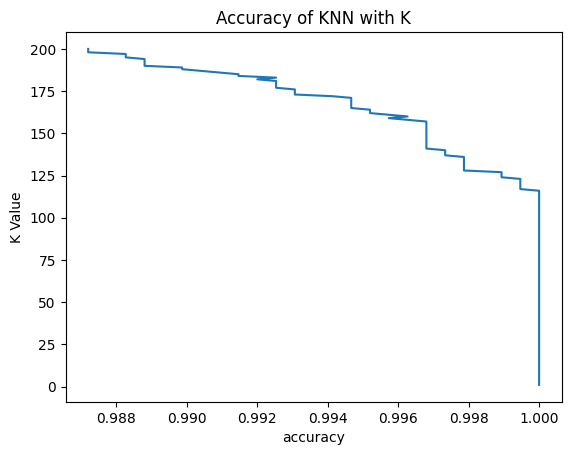

In [62]:
plt.plot(knn_accuracies, K_values)
plt.ylabel("K Value")
plt.xlabel("accuracy")
plt.title("Accuracy of KNN with K")